In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
X=pd.read_csv('Diabetes_Xtest.csv')
x=pd.read_csv('Diabetes_Xtrain.csv')
y=pd.read_csv('Diabetes_Ytrain.csv')


In [71]:
x.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [72]:
x=x.values
y=y.values
X=X.values

In [84]:
y.reshape((-1))
y.shape,x.shape,X.shape

((576, 1), (576, 8), (192, 8))

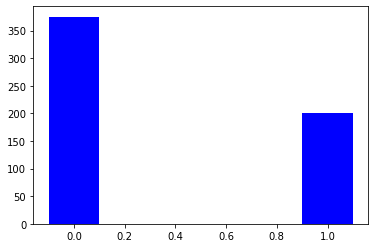

In [74]:
z=np.unique(y,return_counts=True)
plt.bar(z[0],z[1],width=0.2,color='blue')
plt.show()

In [85]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,query_p,k=5):
    
    vals = []
    m = X.shape[0]   
    
    for i in range(m):
        d = dist(query_p,X[i])
        vals.append((d,y[i])) 
        
    vals = sorted(vals)
    vals = vals[:k]  
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [88]:
pred=[]
m=X.shape[0]
for i in range(m):
    p=knn(x,y,X[i])
    pred.append(p)
    
pred=np.array(pred)
pred=pred[:,0]
pred.shape

(192,)

In [103]:
pred=pd.DataFrame(pred)
pred.rename(columns={"0":"Outcome"},inplace=True)

pred.to_csv("diabetes_classification.csv",index=False)